In [1]:
##Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [3]:
#Loading dataset
data = pd.read_csv("/content/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Droping unwanted columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

#Naming the columns
data = data.rename(columns = {'v1':'label','v2':'message'})

In [6]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
#Calculating the lenght of all the messages
data['lenght']=data['message'].apply(len)
data.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
data.describe()

,lenght
count,5572.000000
mean,80.118449
std,59.691196
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

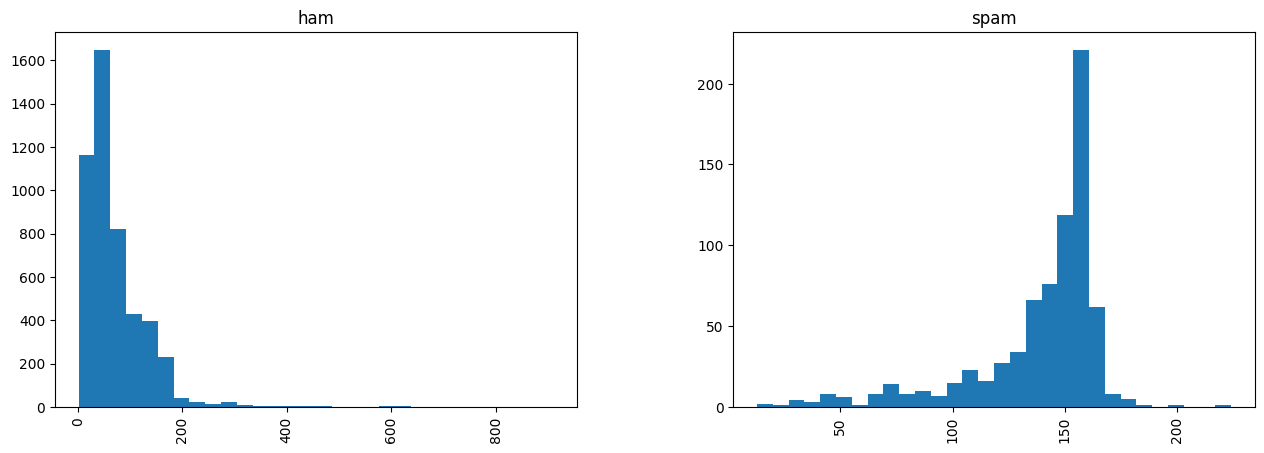

In [10]:
%matplotlib inline

#Plotting the lenght of ham and spam messages
data.hist(by='label',column='lenght',bins=30,figsize=[15,5])

In [11]:
#Converting our labels to numeric labels
# ham = 0 and spam = 1
data['label_num']=data.label.map({'ham':0,'spam':1})
data.head()

,label,message,lenght,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [12]:
#loading our features and target to train
x = data.message
y = data.label_num

In [13]:
#Now we have 5572 labels for 5572 features
#spliting data into 75% test and 25% into train which is by default
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)

In [14]:
vect = CountVectorizer()
#converting features into numeric vector
X_train = vect.fit_transform(x_train)
#converting target into numeric vector
X_test = vect.transform(x_test)

In [15]:
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [16]:
#defining functions for training and testing data

def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)

#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [17]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [18]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))

In [ ]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['scores']*100
score_df